<a href="https://colab.research.google.com/github/MySureStart/MIT_FutureMakers_2023/blob/main/Module_14_Autoencoders/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

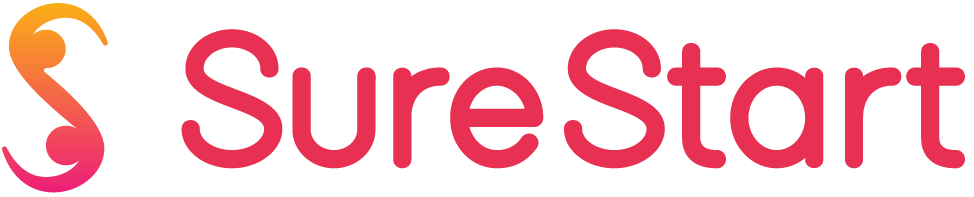

#Objectives
* To familiarize you with upsampling and downsampling.
* To introduce you to Autoencoders.


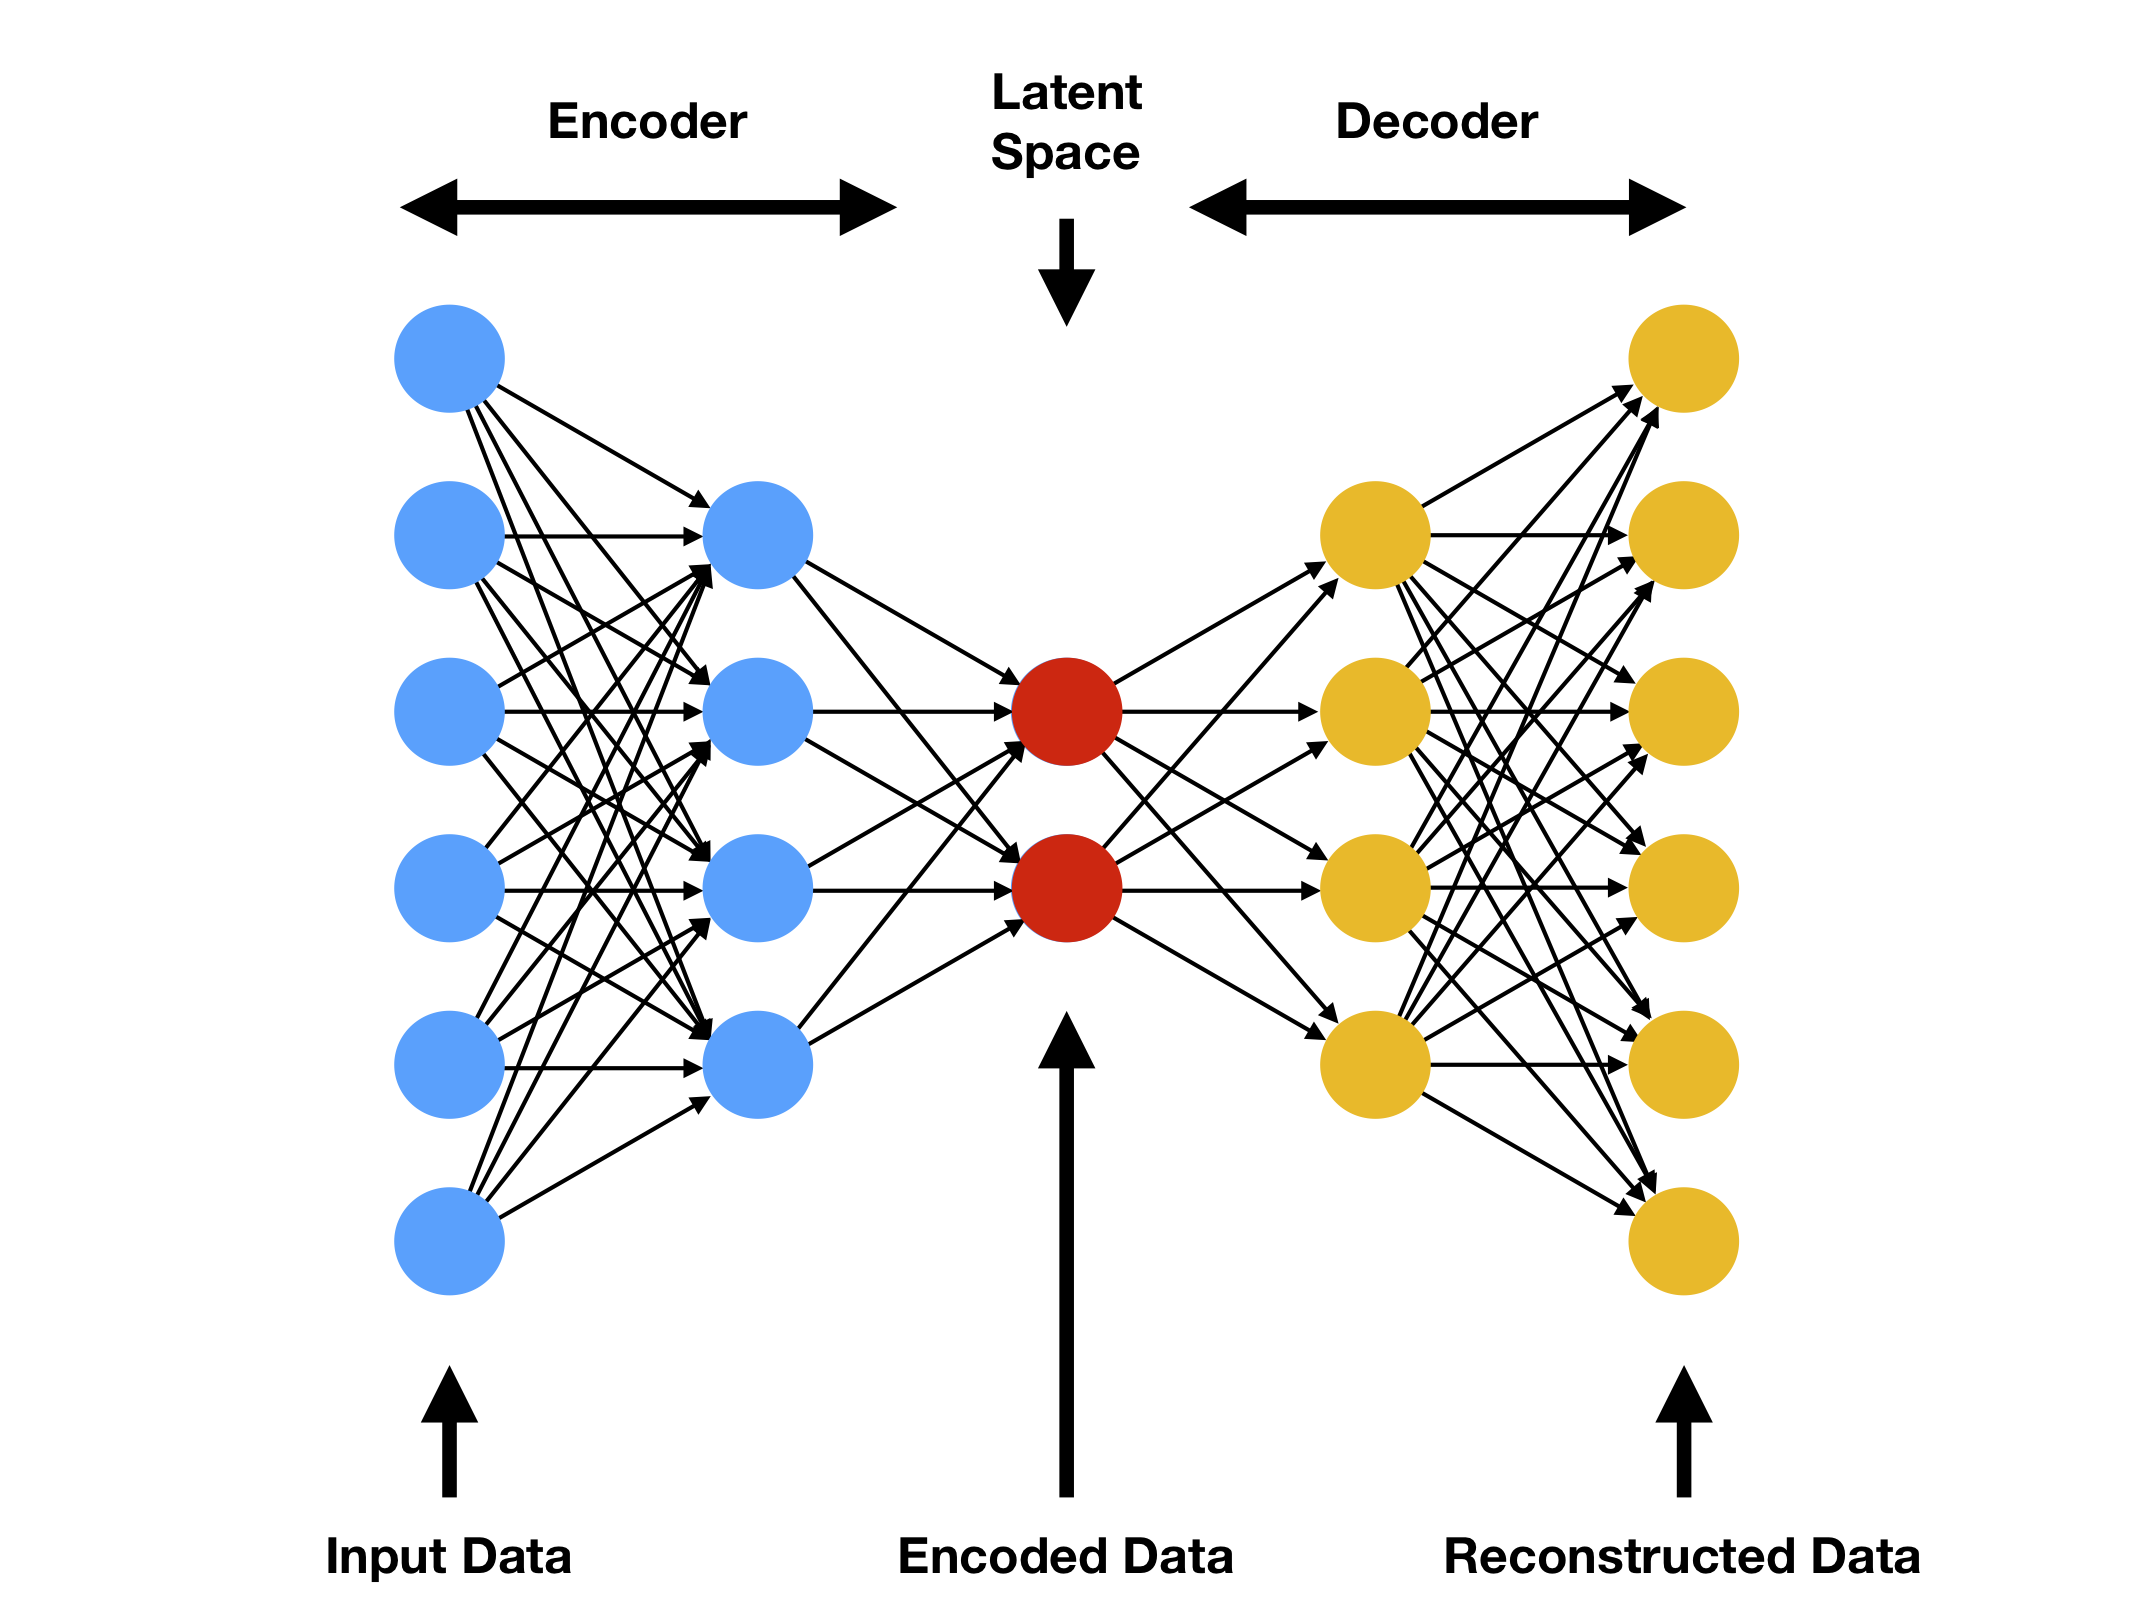

# Autoencoders

Autoencoders are a class of unsupervised networks that consist of two major components: **Encoders** and **Decoders**.

An unsupervised network is a neural network that learns patterns from data without any training labels (without being told what those patterns should be).

In contrast, there are supervised networks where the network is trained to return specific outputs when given specific inputs.

The *Encoder* generally uses a series of dense and/or convolutional layers to encode an image into a fixed length vector which represents the image in a compact form. While the *Decoder* uses dense and/or convolutional layers to convert the latent representation vector back into that same image or another modified image.

The figure above shows an example of a simple autoencoder. In this autoencoder, you can see that the input is compressed into a latent space (the compressed vector is called *latent representation vector*) and then decompressed (reconstructed) into the image of same size as input image.

To generate an image, a random input vector is given to the *decoder* network. The decoder attempts to recreate the input from the compressed version provided.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from matplotlib import pyplot as plt
from IPython import display
import numpy as np

## Upsampling and Downsampling

Let's introduce some more terminology before we can dive into autoencoders.

**Upsampling**: can be synonymous with expansion, or it can describe an entire process of expansion and filtering (interpolation).

**Downsampling**: can be synonymous with compression, or it can describe an entire process of reduction (filtering).

Source: [Wikipedia](https://en.wikipedia.org/wiki/Upsampling)

## Question 1

Now that you know what encoder and decoder are, tell us which one performs upsampling and which one performs downsampling.

< *Type your answer here* >

### Answer 1

\<*Type your answer here*\>

#Data Loading

We are using the MNIST number dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

# Deciding the Latent Size
**Latent representation vector** is the vector holding the information after compression. The size of that vector is called *latent size*. This value is a crucial hyperparameter. If this value is too small, there won't be enough data for reconstruction and if the value is too large, overfitting can occur.

The latent size can also be considered as the dimensions we model the middle of an autoencoder as, where the encoder and decoder are connected.

In [ ]:
LATENT_SIZE = 32

Provided that the encoders have sufficient capability to learn some arbitrary function, it can map the data to a smaller sized representation. For deep autoencoders, we must also be aware of the capacity of our encoder and decoder models. Even if the "bottleneck layer" (where the latent representation vector is generated) is only one hidden node, it's still possible for our model to memorize the training data. 

## Question 2

Is there a lower and upper bound to the latent size with respect to the dimensions of the data?

< *Type your answer here* >

### Answer 2

\<*Type your answer here*\>

#Creating the Encoder
The encoder downscales and compresses the data available to the latent size where the intermediate representation of a model is available.

Here the encoder is just a feed forward neural network which decreases its dense layer output dimensions as it goes forward.

In [ ]:
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(LATENT_SIZE),
    tf.keras.layers.LeakyReLU()
])

The encoder consists of a series of dense layers with dropout and LeakyReLU layers. The dense layers allow for the compression of the 28x28 input tensor down to the latent vector of size 32. The dropout layers help prevent overfitting. LeakyReLU, being the activation layer, introduces non-linearity into the mix. `Dense(LATENT_SIZE)` creates the final vector of size 32.


## Question 3
Can the encoder be used as a classifier?

< *Type your answer here* >

### Answer 3

\<*Type your answer here*\>

#Creating the Decoder
Decoder is also a feedforward network like the encoder and has a similar structure to the encoder. This network is responsible for reconstructing the input back to the original dimensions from the representation vector (also called compressed vector or latent vector).

First, the input goes through the encoder where it is compressed, then the decoder decompresses the original input from the representation vector. The main objective of the autoencoder is **to get an output identical to the input**.

Note that the decoder architecture is the mirror image of the encoder. This is not a requirement but it’s typically the case. The only requirement is the sizes of the input and output vectors must be the same.

In [ ]:
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape = (LATENT_SIZE,)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(784),
    tf.keras.layers.Activation("sigmoid"),
    tf.keras.layers.Reshape((28, 28))
])


The decoder is essentially the same as the encoder but in reverse. The final activation layer is sigmoid, however. The sigmoid activation function output values in the range [0, 1] which fits perfectly with our scaled image data.

##Question 4

Can the decoder be used as a generator (synthesizer) of some data?

< *Type your answer here* >

### Answer 4

\<*Type your answer here*\>

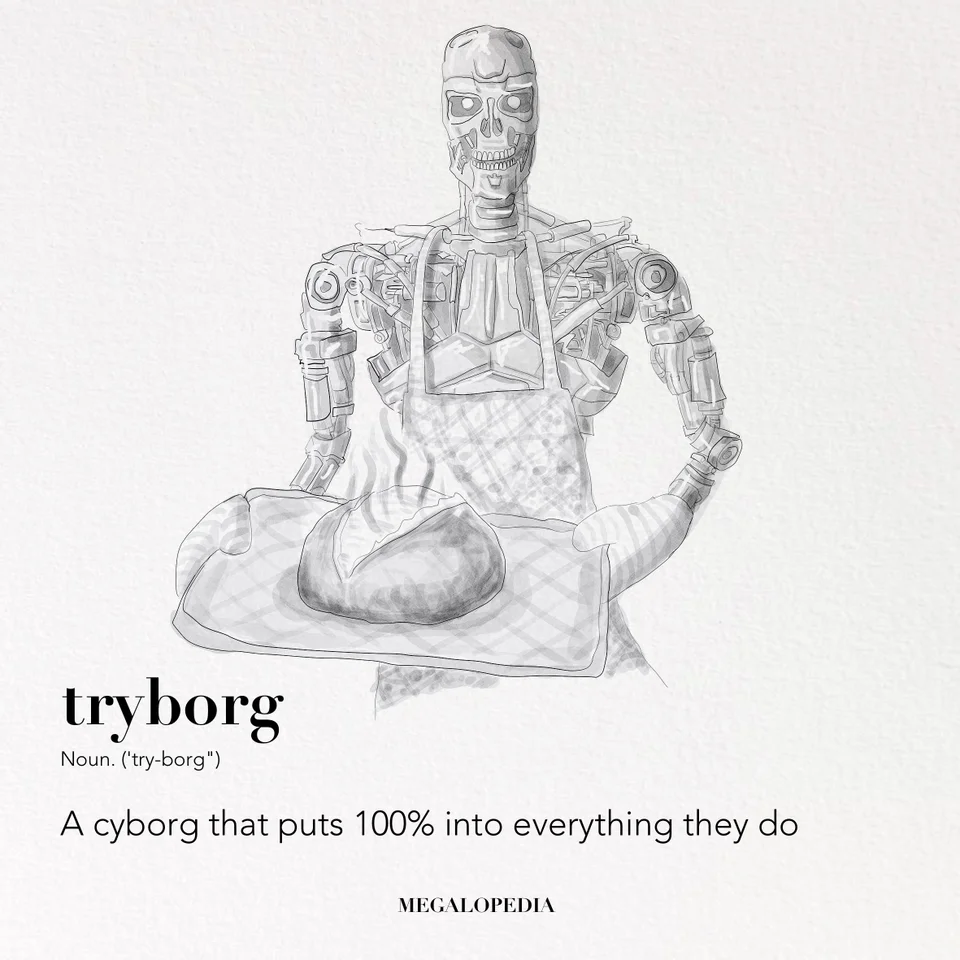

#Creating the Full Model
"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

1. Autoencoders are **data-specific**, which means that they will only be able to 
compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

2. Autoencoders are **lossy**, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

3. Autoencoders are **learned automatically** from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). 

The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using stochastic gradient descent.

In [ ]:
img = tf.keras.Input(shape = (28, 28))

This will create a placeholder tensor which we can feed into each network to get the output of the whole model.

In [ ]:
latent_vector = encoder(img)
output = decoder(latent_vector)

The best part about the Keras Functional API is how readable it is. The Keras Functional API allows you to call models directly onto tensors and get the output from that tensor. By calling the encoder model onto the `img` tensor, we get the `latent_vector`. The same can be done with the decoder model onto the `latent_vector` which gives us the output.


In [ ]:
model = tf.keras.Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

To create the model itself, you use the `tf.keras.Model` class and define what the inputs and outputs of the model are.
To train a model, you must compile it. To compile a model, you have to choose an optimizer and a loss function. For the optimizer, we chose Nadam, which is Nesterov Accelerated Gradient applied to Adaptive Moment Estimation. It is a modified Adam optimizer. 

For the loss, we chose binary cross-entropy. Binary Cross-Entropy is very commonly used with autoencoders. Usually, however, binary cross-entropy is used with binary classifiers. Additionally, binary cross-entropy can only be used between output values in the range [0, 1].

In [ ]:
EPOCHS = 60
#Training the Model
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)


First, we create plots with 4 rows and 4 columns of subplots and choose 16 random testing data images to check how well the network performs.
Next, we clear the screen (only works on IPython, Jupyter, and Colab notebooks) and plot the predictions by the model on the random testing images.

Finally, we train the model. To train the model we simply call `model.fit` on the training image data. Remember how the autoencoder’s goal is to take the input data, compress it, decompress it, and then output a copy of the input data? This means that the input and the target output are both the training image data.

As you can see, these generated images are pretty good. The biggest problem with the images, however, is with the blurriness. Many of these problems can be fixed with other types of generative networks or even other types of autoencoders.

## Question 5

Train an autoencoder with latent size between 10 to 15.
Learn what hyperparameters it requires to create a '0' as the output image.

### Answer 5

In [ ]:
encoder = tf.keras.models.Sequential([
# Define your encoder here
])

In [ ]:
decoder = tf.keras.models.Sequential([
# Define your decoder here
])


In [ ]:
img = # Input Image

In [ ]:
latent_vector = # Pass input to encoder
output = # Pass latent vector to decoder

In [ ]:
model = # Define Model
model.compile(
    # Choose an optimizer,
    loss = #Choose a loss function
    )

In [ ]:
# Training the Model

# You may make use of the previous training loop

In [ ]:
# Pass input image to Autoencoder

#Display how the latent space clusters different digit classes
Because our latent space is two-dimensional, there are a few cool visualizations that can be done at this point. One is to look at the neighborhoods of different classes on the latent 2D plane:



In [ ]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels,cmap = 'viridis')
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(model, x_train, y_train)

# Upload this Colab Notebook to your Github repository. Also add your *reflections* on today's learning in README.md

# References

https://blog.keras.io/building-autoencoders-in-keras.html

https://www.tensorflow.org/tutorials/generative/cvae